In [1]:
# %% Importing
# System
import os
import sys

# Computing
import mne
import numpy as np

# Plotting
import matplotlib.pyplot as plt
from surfer import Brain
from mayavi import mlab

__file__ = os.path.curdir
sys.path.append(os.path.join(os.path.dirname(__file__), '..', 'tools'))  # noqa
from MEG_worker import MEG_Worker
from visualizer import Visualizer
from inverse_solver import Inverse_Solver

In [2]:
mne.utils.get_config()

{'MNE_COREG_ADVANCED_RENDERING': 'true',
 'MNE_COREG_COPY_ANNOT': 'true',
 'MNE_COREG_GUESS_MRI_SUBJECT': 'false',
 'MNE_COREG_HEAD_HIGH_RES': 'true',
 'MNE_COREG_HEAD_OPACITY': '1.0',
 'MNE_COREG_INTERACTION': 'trackball',
 'MNE_COREG_MARK_INSIDE': 'false',
 'MNE_COREG_ORIENT_TO_SURFACE': 'false',
 'MNE_COREG_PREPARE_BEM': 'true',
 'MNE_COREG_PROJECT_EEG': 'false',
 'MNE_COREG_SCALE_BY_DISTANCE': 'false',
 'MNE_COREG_SCALE_LABELS': 'true',
 'MNE_COREG_SCENE_SCALE': '0.16',
 'MNE_COREG_SUBJECTS_DIR': '/home/zcc/documents/freesurfer/subjects',
 'MNE_COREG_WINDOW_HEIGHT': '798',
 'MNE_COREG_WINDOW_WIDTH': '1148',
 'MNE_DATASETS_SAMPLE_PATH': '/home/zcc/mne_data',
 'MNE_DATASETS_SPM_FACE_PATH': '/home/zcc/mne_data',
 'MNE_USE_CUDA': 'true',
 'SUBJECTS_DIR': '/nfs/diskstation/zccdata/freesurfer/subjects',
 'SUBJECT_DIR': '/nfs/diskstation/zccdata/freesurfer/subjects'}

In [3]:
try:
    src_fsaverage = mne.read_source_spaces('fsaverage_src.fif')
except:
    src_fsaverage = mne.setup_source_space('fsaverage', spacing='oct6', n_jobs=40)
    mne.write_source_spaces('src_fsaverage_src.fif', src)
src_fsaverage

    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read


<SourceSpaces: [<surface (lh), n_vertices=163842, n_used=4098>, <surface (rh), n_vertices=163842, n_used=4098>] MRI (surface RAS) coords, subject 'fsaverage'>

In [27]:
epochs

<EpochsFIF  |   497 events (all good), -0.2 - 1.2 sec, baseline [-0.2, 0], ~145.9 MB, data loaded,
 '1': 497>

In [28]:
solver.inv

<InverseOperator | MEG channels: 272 | EEG channels: 0 | Source space: surface with 8196 sources | Source orientation: Free>

In [67]:
snr = 1.0  # use lower SNR for single epochs
lambda2 = 1.0 / snr ** 2
method = "dSPM"  # use dSPM method (could also be MNE or sLORETA)
inverse_operator = solver.inv
stcs = mne.minimum_norm.apply_inverse_epochs(epochs,
                                             inverse_operator,
                                             lambda2,
                                             method,
                                             pick_ori="normal",
                                             return_generator=True)
src = inverse_operator['src']

_labels = [e[1] for e in labels.items() if not e[0].startswith('unknown')]

label_ts = mne.extract_label_time_course(stcs, _labels, src, mode='mean_flip',
                                         return_generator=True)

Preparing the inverse operator for use...
    Scaled noise and source covariance from nave = 1 to nave = 1
    Created the regularized inverter
    The projection vectors do not apply to these channels.
    Created the whitener using a noise covariance matrix with rank 6 (266 small eigenvalues omitted)
    Computing noise-normalization factors (dSPM)...
[done]
Picked 272 channels from the data
Computing inverse...
    Eigenleads need to be weighted ...
Processing epoch : 1 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 2 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 3 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 4 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 5 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 6 / 497
Extracting time courses for 92 labels (mode: mean_flip)
Processing epoch : 7 / 497
Extracting time co

In [73]:
label_ts

(92, 141)

In [95]:
sfreq = 100
fmin = 0.1
fmax = 20.0
con, freqs, times, n_epochs, n_tapers = mne.connectivity.spectral_connectivity(
    label_ts, method='wpli2_debiased', mode='multitaper', sfreq=sfreq,
    fmin=fmin, fmax=fmax, mt_adaptive=True, n_jobs=32)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 4186 connections
    using t=0.000s..1.400s for estimation (141 points)
    frequencies: 0.7Hz..19.9Hz (28 points)
    Using multitaper spectrum estimation with 7 DPSS windows
    the following metrics will be computed: Debiased WPLI Square
    computing connectivity for epochs 1..32


<ipython-input-95-f095bf8c4bdd>:6: RuntimeWarning: fmin=0.100 Hz corresponds to 0.141 < 5 cycles based on the epoch length 1.410 sec, need at least 50.000 sec epochs or fmin=3.546. Spectrum estimate will be unreliable.
  fmin=fmin, fmax=fmax, mt_adaptive=True, n_jobs=32)
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    4.1s remaining:   12.2s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    4.5s remaining:    5.1s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    4.6s remaining:    2.1s


    computing connectivity for epochs 33..64


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    4.7s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    4.8s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 65..96


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 97..128


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s


    computing connectivity for epochs 129..160


[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 161..192


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.4s


    computing connectivity for epochs 193..224


[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 225..256


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 257..288


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 289..320


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.8s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.5s remaining:    0.1s


    computing connectivity for epochs 321..352


[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    0.8s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.4s remaining:    0.2s


    computing connectivity for epochs 353..384


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.4s remaining:    1.3s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.6s remaining:    0.3s


    computing connectivity for epochs 385..416


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    0.9s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s


    computing connectivity for epochs 417..448


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.7s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.3s remaining:    1.0s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.4s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.5s remaining:    0.1s


    computing connectivity for epochs 449..480


[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.6s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   8 out of  32 | elapsed:    0.4s remaining:    1.2s
[Parallel(n_jobs=32)]: Done  15 out of  32 | elapsed:    0.5s remaining:    0.6s
[Parallel(n_jobs=32)]: Done  22 out of  32 | elapsed:    0.6s remaining:    0.3s


    computing connectivity for epochs 481..497


[Parallel(n_jobs=32)]: Done  29 out of  32 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.9s finished
[Parallel(n_jobs=32)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=32)]: Done   2 out of  17 | elapsed:    0.2s remaining:    1.5s
[Parallel(n_jobs=32)]: Done   6 out of  17 | elapsed:    0.2s remaining:    0.5s
[Parallel(n_jobs=32)]: Done  10 out of  17 | elapsed:    0.4s remaining:    0.3s


    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


[Parallel(n_jobs=32)]: Done  14 out of  17 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=32)]: Done  17 out of  17 | elapsed:    0.5s finished


In [96]:
con.shape, freqs

((92, 92, 28),
 array([ 0.70921986,  1.41843972,  2.12765957,  2.83687943,  3.54609929,
         4.25531915,  4.96453901,  5.67375887,  6.38297872,  7.09219858,
         7.80141844,  8.5106383 ,  9.21985816,  9.92907801, 10.63829787,
        11.34751773, 12.05673759, 12.76595745, 13.4751773 , 14.18439716,
        14.89361702, 15.60283688, 16.31205674, 17.0212766 , 17.73049645,
        18.43971631, 19.14893617, 19.85815603]))

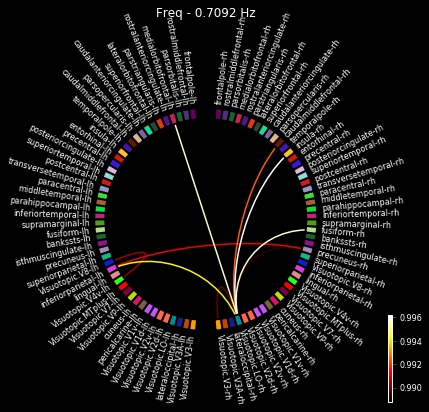

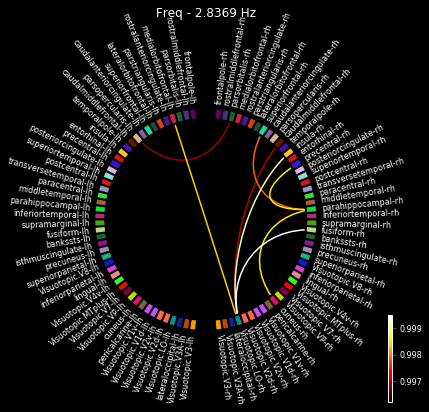

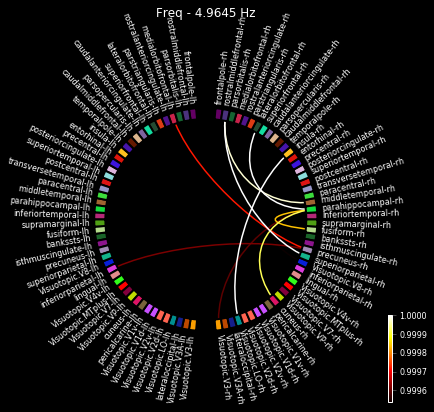

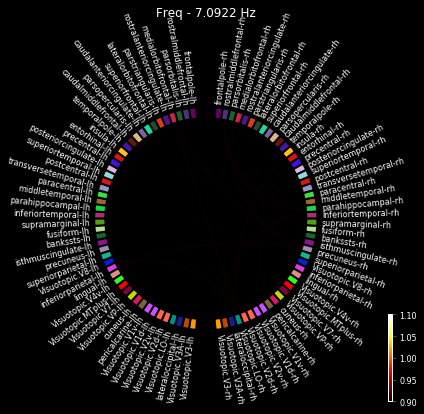

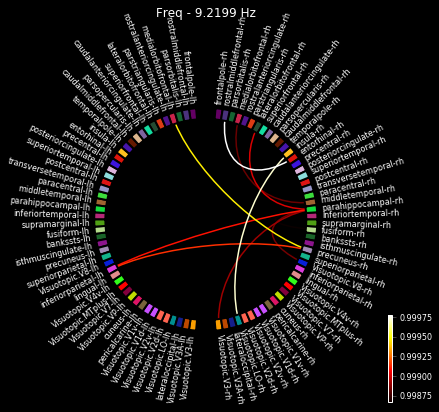

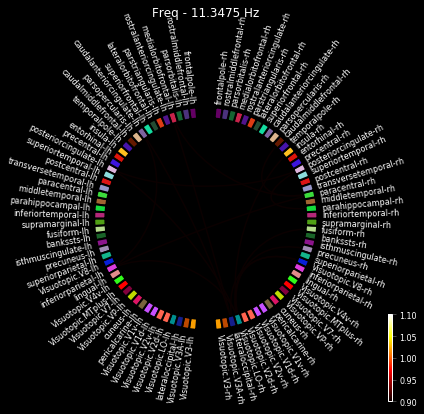

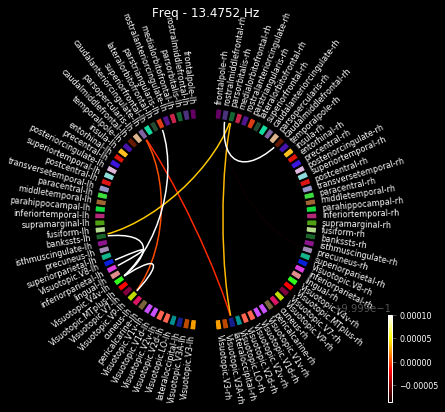

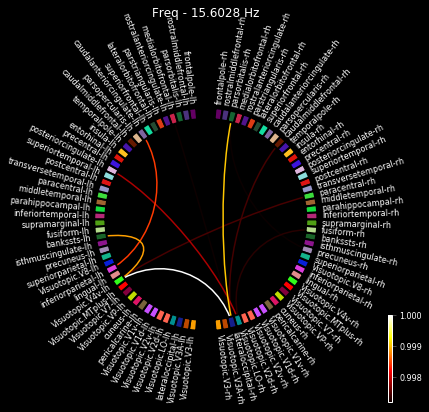

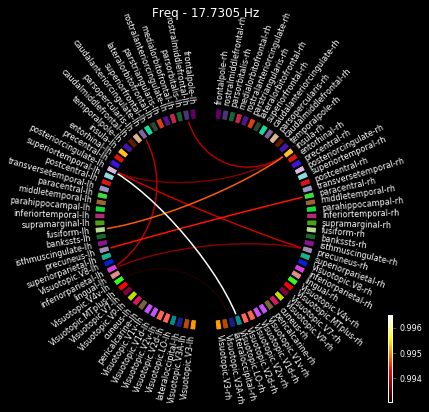

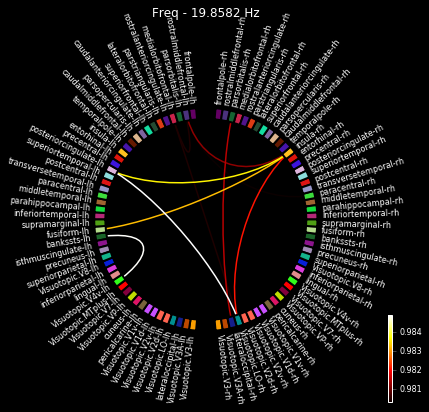

In [102]:
# First, we reorder the labels based on their location in the left hemi
label_names = [label.name for label in _labels]
label_colors = [label.color for label in _labels]

lh_labels = [name for name in label_names if name.endswith('lh')]

# Get the y-location of the label
label_ypos = list()
for name in lh_labels:
    idx = label_names.index(name)
    ypos = np.mean(_labels[idx].pos[:, 1])
    label_ypos.append(ypos)

# Reorder the labels based on their location
lh_labels = [label for (yp, label) in sorted(zip(label_ypos, lh_labels))]

# For the right hemi
rh_labels = [label[:-2] + 'rh' for label in lh_labels]

# Save the plot order and create a circular layout
node_order = list()
node_order.extend(lh_labels[::-1])  # reverse the order
node_order.extend(rh_labels)
       
node_angles = mne.viz.circular_layout(label_names, node_order, start_pos=90,
                              group_boundaries=[0, len(label_names) / 2])

for j, name in enumerate(label_names):
    if name not in select_labels:
#         label_names[j] = '-'
        pass
        
# Plot the graph using node colors from the FreeSurfer parcellation. We only
# show the 300 strongest connections.
# fig, axes = plt.subplots(3, 3, figsize=(18, 18))
for j, freq in enumerate(freqs[::3]):
    mne.viz.plot_connectivity_circle(con[:, :, j],
                                     label_names,
                                     n_lines=10,
                                     node_angles=node_angles,
                                     node_colors=label_colors,
                                     title=f'Freq - {freq:0.4f} Hz',
                                    )
#                                      fig=fig,
#                                      subplot=(3, 3, j+1))

In [11]:
# %%
# DO NOT RUN THIS UNLESS YOU WANT TO RECOMPUTE STC
stcs = dict()
stcs_baseline = dict()

spacing = [s['vertno'] for s in src_fsaverage]

for idx in range(1, 11):
    running_name = f'MEG_S{idx:02d}'
    band_name = 'U07'

    raw = mne.io.read_raw_fif(os.path.join(
        '/home/zcc/RSVP_dataset/processed_data',
        f'{running_name}/block_03_raw.fif'))
    
    _epochs = mne.read_epochs(os.path.join(
        '/home/zcc/Documents/zcc_meg_toolbox/v2.0/mvpa_new/MVPA_data_xdawn_v3',
        f'{running_name}-0-train-epo.fif'))
    epochs = _epochs['1']
    epochs_baseline = _epochs['2']
    
    solver = Inverse_Solver(running_name=running_name)
    solver.pipeline(epochs=epochs,
                    raw_info=raw.info)
    
    stc, stc_fsaverage = solver.estimate(obj=epochs.average(), spacing=spacing)
    stc, stc_fsaverage_baseline = solver.estimate(obj=epochs_baseline.average(), spacing=spacing)
    
    stcs[running_name] = stc_fsaverage
    stcs_baseline[running_name] = stc_fsaverage_baseline
    
display(stcs)
display(stcs_baseline)

data = stc_fsaverage.data * 0
for running_name in stcs:
    data += stcs[running_name].data
stc_fsaverage.data = data / len(stcs)

data = stc_fsaverage_baseline.data * 0
for running_name in stcs_baseline:
    data += stcs_baseline[running_name].data
stc_fsaverage_baseline.data = data / len(stcs)

stc_fsaverage.save(os.path.join('fif_files', 'stc_fsaverage'))
stc_fsaverage_baseline.save(os.path.join('fif_files', 'stc_fsaverage_baseline'))

Opening raw data file /home/zcc/RSVP_dataset/processed_data/MEG_S01/block_03_raw.fif...
    Read 5 compensation matrices
    Range : 0 ... 431999 =      0.000 ...   359.999 secs
Ready.
Current compensation grade : 3
Reading /home/zcc/Documents/zcc_meg_toolbox/v2.0/mvpa_new/MVPA_data_xdawn_v3/MEG_S01-0-train-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...    1200.00 ms
        0 CTF compensation matrices available
10157 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Inversing on RSVP_MRI_S01
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    Reading a source space...
    Computing patch statistics...
    Patch information added...
    Distance information added...
    [done]
    2 source spaces read
    3 BEM surfaces found
    Reading a surface...
[done]
    Reading a surface...
[done]
    Reading a surfac

{'MEG_S01': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S02': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S03': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S04': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S05': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S06': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'ME

{'MEG_S01': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S02': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S03': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S04': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S05': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'MEG_S06': <SourceEstimate  |  8196 vertices, subject : fsaverage, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>,
 'ME

Writing STC to disk...
[done]
Writing STC to disk...
[done]


In [12]:
# %%
mne.viz.set_3d_backend('pyvista')

label_list_aparc = mne.read_labels_from_annot('fsaverage', 'aparc', 'both')
label_list_visuotopic = mne.read_labels_from_annot('fsaverage', 'PALS_B12_Visuotopic', 'both')

display(label_list_aparc)
display(label_list_visuotopic)

labels = dict()

for j, label in enumerate(label_list_visuotopic):
    if label.name.startswith('Visuotopic'):
        labels[label.name] = label
        
ROIs = ['fusiform',
        'temporal',
       ]
for j, label in enumerate(label_list_aparc):
    labels[label.name] = label
        

Using pyvista 3d backend.

Reading labels from parcellation...
   read 35 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.aparc.annot
   read 34 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.aparc.annot
Reading labels from parcellation...
   read 16 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/lh.PALS_B12_Visuotopic.annot
   read 27 labels from /nfs/diskstation/zccdata/freesurfer/subjects/fsaverage/label/rh.PALS_B12_Visuotopic.annot


[<Label  |  fsaverage, 'bankssts-lh', lh : 2137 vertices>,
 <Label  |  fsaverage, 'bankssts-rh', rh : 2196 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-lh', lh : 1439 vertices>,
 <Label  |  fsaverage, 'caudalanteriorcingulate-rh', rh : 1608 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-lh', lh : 3736 vertices>,
 <Label  |  fsaverage, 'caudalmiddlefrontal-rh', rh : 3494 vertices>,
 <Label  |  fsaverage, 'cuneus-lh', lh : 1630 vertices>,
 <Label  |  fsaverage, 'cuneus-rh', rh : 1638 vertices>,
 <Label  |  fsaverage, 'entorhinal-lh', lh : 1102 vertices>,
 <Label  |  fsaverage, 'entorhinal-rh', rh : 902 vertices>,
 <Label  |  fsaverage, 'frontalpole-lh', lh : 272 vertices>,
 <Label  |  fsaverage, 'frontalpole-rh', rh : 369 vertices>,
 <Label  |  fsaverage, 'fusiform-lh', lh : 4714 vertices>,
 <Label  |  fsaverage, 'fusiform-rh', rh : 4661 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-lh', lh : 7871 vertices>,
 <Label  |  fsaverage, 'inferiorparietal-rh', rh : 9

[<Label  |  fsaverage, '???-lh', lh : 116427 vertices>,
 <Label  |  fsaverage, '???-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, '???????-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'AUDITORY-lh', lh : 930 vertices>,
 <Label  |  fsaverage, 'AUDITORY-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'GYRUS-rh', rh : 117864 vertices>,
 <Label  |  fsaverage, 'LANDMARK.MT-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2d-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'LANDMARK.V2v-rh', rh : 1867 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-lh', lh : 11608 vertices>,
 <Label  |  fsaverage, 'MEDIAL.WALL-rh', rh : 11312 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-lh', lh : 22715 vertices>,
 <Label  |  fsaverage, 'NonVisuotopic-rh', rh : 21697 vertices>,
 <Label  |  fsaverage, 'SUL.HF-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'SUL.ISS-rh', rh : 955 vertices>,
 <Label  |  fsaverage, 'Thresh_Normal_dee

In [ ]:
# DO NOT RUN THIS,
# IT IS VERY SLOW
if False:
    brain = Brain(subject_id='fsaverage',
                  hemi='split',
                  surf='inflated',
                  cortex='low_contrast',
                  background='white',
                  size=(800, 600))
    # brain.add_annotation('aparc')
    # brain.add_annotation(label_name)
    for name in labels:
        print(name)
        brain.add_label(labels[name], borders=True)
    print('Done.')

    mlab.show()

In [14]:
stc_fsaverage = mne.read_source_estimate(os.path.join('fif_files', 'stc_fsaverage'))
stc_fsaverage_baseline = mne.read_source_estimate(os.path.join('fif_files', 'stc_fsaverage_baseline'))

stc = stc_fsaverage_baseline
stc.data = stc_fsaverage.data - stc_fsaverage_baseline.data
stc

<SourceEstimate  |  8196 vertices, tmin : -200.0 (ms), tmax : 1200.0000000000002 (ms), tstep : 10.0 (ms), data shape : (8196, 141)>

In [15]:
alldata = sorted(stc.data.ravel(), reverse=True)
n = len(alldata)
LIMS = [alldata[int(n * r)] for r in [0.05, 0.01, 0.005, 0]]
LIMS

[27.154327, 33.061977, 35.144455, 47.206467]

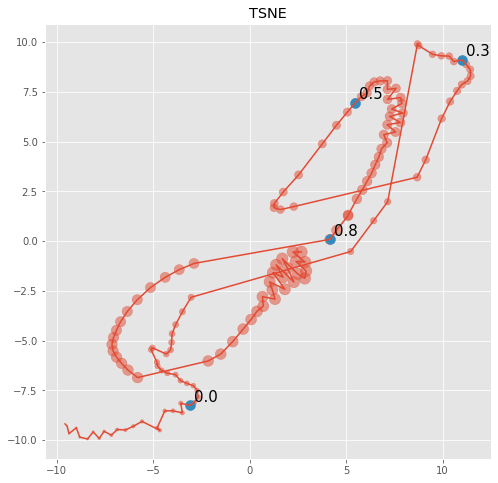

In [24]:
lims = LIMS[1:]

from sklearn.manifold import TSNE

data = stc.data
large_data = data[np.max(data, axis=1) > lims[0]]
large_data.shape, data.shape

tsne = TSNE(n_components=2, n_jobs=40)
proj_data = tsne.fit_transform(data.transpose())

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.scatter(proj_data[:, 0], proj_data[:, 1], range(141), alpha=0.5)
ax.plot(proj_data[:, 0], proj_data[:, 1])

idxs = []
for t in [0.0, 0.3, 0.5, 0.8]:
    idx = np.where(t == stc.times)[0][0]
    ax.text(proj_data[idx, 0]+0.2, proj_data[idx, 1]+0.2, t, fontdict=dict(size=15))
    idxs.append(idx)
    
ax.scatter(proj_data[idxs, 0], proj_data[idxs, 1], 100)
ax.set_title('TSNE')

fig.savefig('TSNE.png')

In [17]:
ts = mne.extract_label_time_course(stc, label_list_aparc, src_fsaverage, mode='mean_flip', allow_empty=True, return_generator=True)
ts.shape

Extracting time courses for 69 labels (mode: mean_flip)


<ipython-input-17-34ad0a17b39a>:1: RuntimeWarning: source space does not contain any vertices for label unknown-lh. Assigning all-zero time series to label.
  ts = mne.extract_label_time_course(stc, label_list_aparc, src_fsaverage, mode='mean_flip', allow_empty=True, return_generator=True)


(69, 141)

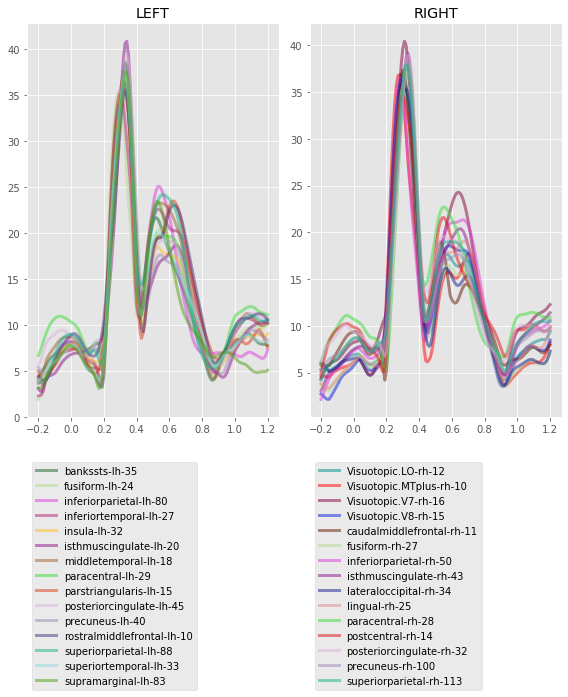

In [19]:
lims = LIMS[1:]

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 2, figsize=(8, 10))

times = stc.times
select_labels = dict()
for name in labels:
    label = labels[name]
    color = label.color
    try:
        stc_inlabel = stc.in_label(label)
    except ValueError:
        continue
    data = stc_inlabel.data
    data = data[np.max(data, axis=1) > lims[1]]
    if len(data) < 10:
        continue
    # print(name, color, data.shape)
    
#     sort = sorted(data.ravel(), reverse=True)
#     if sort[1000] < lims[0]:
#         continue
    
    mean_data = np.mean(data, axis=0)
    
    if name.endswith('-lh'):
        ax = axes[0]
    else:
        ax = axes[1]
        
    ax.plot(times, mean_data, c=color, label=f'{name}-{len(data)}', alpha=0.5, linewidth=3)
    
    select_labels[name] = label

for j in [0, 1]:
    axes[j].legend(loc='upper left', bbox_to_anchor=(0, -0.1))
    
axes[0].set_title('LEFT')
axes[1].set_title('RIGHT')

fig.tight_layout()
fig.savefig('WaveForm.png')

In [26]:
lims, initial_time = LIMS[1:], 0.3
# lims, initial_time = LIMS[:-1], 0.5
mne.viz.set_3d_backend('pyvista')
views = ['lat']
clim = dict(kind='value', lims=lims)
surfer_kwargs = dict(hemi='both',
                     clim=clim,
                     views=views,
                     initial_time=initial_time,
                     time_unit='s',
                     size=(800, 800),
                     smoothing_steps=10,
                     time_viewer=True,
                     subject='fsaverage')

# This can not be operated using VS code
brain = stc.plot(**surfer_kwargs)

for name in select_labels:
    print(name)
    brain.add_label(labels[name], borders=True)

# mlab.show()

Visuotopic.LO-rh
Visuotopic.MTplus-rh
Visuotopic.V7-rh
Visuotopic.V8-rh
bankssts-lh
caudalmiddlefrontal-rh
fusiform-lh
fusiform-rh
inferiorparietal-lh
inferiorparietal-rh
inferiortemporal-lh
insula-lh
isthmuscingulate-lh
isthmuscingulate-rh
lateraloccipital-rh
lingual-rh
middletemporal-lh
paracentral-lh
paracentral-rh
parstriangularis-lh
postcentral-rh
posteriorcingulate-lh
posteriorcingulate-rh
precuneus-lh
precuneus-rh
rostralmiddlefrontal-lh
superiorparietal-lh
superiorparietal-rh
superiortemporal-lh
supramarginal-lh


In [ ]:
lims = LIMS[:3]
mne.viz.set_3d_backend('pyvista')
views = ['lat', 'med', 'cau', 'dor', 'ven']
clim = dict(kind='value', lims=lims)
surfer_kwargs = dict(hemi='both',
                     clim=clim,
                     views=views,
                     initial_time=0.5,
                     time_unit='s',
                     size=(800, 800),
                     smoothing_steps=10,
                     time_viewer=False,
                     subject='fsaverage')

# This can not be operated using VS code
brain = stc.plot(**surfer_kwargs)

# for name in select_labels:
#     print(name)
#     brain.add_label(labels[name], borders=True)

# mlab.show()